In [1]:
# Compute JDPF of the product
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_multizoom
from R_tools_theo import * 

In [2]:
import matplotlib.colors as colors
# 2d hist 
import scipy.stats as st

def plot_jpdf(vrt,strain,title=None):

    binx = np.arange(-1,1.025,0.025)
    biny = np.arange(0,1.0125,0.0125)

    H_sum, xedges, yedges, _ = st.binned_statistic_2d(vrt.ravel(),strain.ravel(),vrt.ravel(),\
                    'count', bins=[binx, biny])

    fig = plt.figure(figsize=(10,5))

    list_proba = [99.9,99,90]

    H_norm = H_sum/np.sum(H_sum)
    ax = fig.add_subplot(1,1,1)
    #plt.title(gap_list[i],size=20)

    plt.pcolormesh(xedges[:],yedges[:],H_norm.T,norm=colors.LogNorm(vmin=1e-6, vmax=1e-1),cmap=plt.cm.Reds)
    cbar = plt.colorbar()
    cbar.set_label('Density', fontsize=16)
    cbar.ax.tick_params(labelsize=16)

    xedges=(xedges[1:]+xedges[:-1])/2
    yedges=(yedges[1:]+yedges[:-1])/2

    plt.xlabel(r'$\zeta/f$',fontsize=16); plt.ylabel(r'$\sigma/f$',fontsize=16)

    if title:
        plt.title(title,fontsize=16)

    #CS = plt.contour(xedges[1:],yedges[1:],H_sum.T,linewidths=2,alpha=1,colors='k',linestyles='-')

    level,fmt = add_contour_per(H_sum.T,list_proba,xedges,yedges,c='k')
    CS = plt.contour(xedges,yedges,H_sum.T,level,linewidths=2,alpha=1,colors='k',linestyles='-')
    plt.clabel(CS,level, inline=1, fontsize=18,fmt = fmt)

    ### LES AJOUTS ####
    x = np.linspace(0, 1, 100)
    x1 = np.linspace(0, 1, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey') 

def plot_jpdf_list_daily(vrt_list,strain_list,color_list,style_list,label_list,title=None,legend=False):

    binx = np.arange(-1,1.025,0.025)
    biny = np.arange(0,1.0125,0.0125)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)

    i=1

    for vrt,strain,color,style,label in zip(vrt_list,strain_list,color_list,style_list,label_list):
        H_sum, xedges, yedges, _ = st.binned_statistic_2d(vrt.ravel(),strain.ravel(),vrt.ravel(),\
                        'count', bins=[binx, biny])

        
        list_proba = [99.9,90]

        H_norm = H_sum/np.sum(H_sum)

        #plt.title(gap_list[i],size=20)
        if i==len(vrt_list):
            plt.pcolormesh(xedges[:],yedges[:],H_norm.T,norm=colors.LogNorm(vmin=1e-6, vmax=1e-1),cmap=plt.cm.Reds)
            cbar = plt.colorbar()
            cbar.set_label('Density', fontsize=16)
            cbar.ax.tick_params(labelsize=16)
        else:
            i=i+1
        xedges=(xedges[1:]+xedges[:-1])/2
        yedges=(yedges[1:]+yedges[:-1])/2

        plt.xlabel(r'$\zeta/f$',fontsize=16); plt.ylabel(r'$\sigma/f$',fontsize=16)

        if title:
            plt.title(title,fontsize=16)

        #CS = plt.contour(xedges[1:],yedges[1:],H_sum.T,linewidths=2,alpha=1,colors='k',linestyles='-')

        level,fmt = add_contour_per(H_sum.T,list_proba,xedges,yedges,c='k')
        CS = plt.contour(xedges,yedges,H_sum.T,level,linewidths=2,alpha=1,colors=color,linestyles=style)
        plt.plot(0,0,linewidth=2,alpha=1,color=color,linestyle=style,label=label)
        #plt.clabel(CS,label, inline=1, fontsize=18,fmt = fmt)

    ### LES AJOUTS ####
    x = np.linspace(0, 1, 100)
    x1 = np.linspace(0, 1, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey') 

    if legend==True:
        plt.legend()

from datetime import datetime, timedelta

def plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,title=None,legend=False, list_proba = [99.9,90]):

    binx = np.arange(-1,1.025,0.025)
    biny = np.arange(0,1.0125,0.0125)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)

    i=1
    
    vrt_list = []
    strain_list = []

    for xp_name,color,style,label in zip(xp_name_list,color_list,style_list,label_list):
        current_date = start_date 
        vrt=[]
        strain=[]
        while current_date <= end_date:
            time_target = current_date.strftime("%Y-%m-%d")
            #print(time_target)
            strain_i, vrt_i, lon, lat = compute_strain_vrt(xp_name,domain=domain,time_target=time_target,interp=True)
            vrt.append(vrt_i)
            strain.append(strain_i)
            current_date += timedelta(days=1)

        vrt=np.array(vrt)
        strain=np.array(strain)    

        #print("compute bin")
        H_sum, xedges, yedges, _ = st.binned_statistic_2d(vrt.ravel(),strain.ravel(),vrt.ravel(),\
                        'count', bins=[binx, biny])

        H_norm = H_sum/np.sum(H_sum)

        #plt.title(gap_list[i],size=20)
        if i==len(xp_name_list):
            plt.pcolormesh(xedges[:],yedges[:],H_norm.T,norm=colors.LogNorm(vmin=1e-6, vmax=1e-1),cmap=plt.cm.Reds)
            cbar = plt.colorbar()
            cbar.set_label('Density', fontsize=16)
            cbar.ax.tick_params(labelsize=16)
        else:
            i=i+1
        xedges=(xedges[1:]+xedges[:-1])/2
        yedges=(yedges[1:]+yedges[:-1])/2

        plt.xlabel(r'$\zeta/f$',fontsize=16); plt.ylabel(r'$\sigma/f$',fontsize=16)

        if title:
            plt.title(title,fontsize=16)

        #CS = plt.contour(xedges[1:],yedges[1:],H_sum.T,linewidths=2,alpha=1,colors='k',linestyles='-')

        level,fmt = add_contour_per(H_sum.T,list_proba,xedges,yedges,c='k')
        CS = plt.contour(xedges,yedges,H_sum.T,level,linewidths=2,alpha=1,colors=color,linestyles=style)
        plt.plot(0,0,linewidth=2,alpha=1,color=color,linestyle=style,label=label)
        #plt.clabel(CS,label, inline=1, fontsize=18,fmt = fmt)

    ### LES AJOUTS ####
    x = np.linspace(0, 1, 100)
    x1 = np.linspace(0, 1, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey') 

    lim=0.7
    plt.xlim(-lim,lim)
    plt.ylim(0,lim)
    
    if legend==True:
        plt.legend()


In [3]:
def compute_strain_vrt(xp_name,domain=False,interp=False,time_target=None):

    if time_target is None:
        time_target='2019-01-01'

    if xp_name=="duacs_15m_8th":
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/duacs_15m_8th_{time_target}.nc"
    else:
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/unet_rec_{time_target}.nc"

    duacs = xr.open_dataset(result_filepath)


    if "lat" in duacs.coords:
        duacs = duacs.rename({"lat": "latitude"})
    if "lon" in duacs.coords:
        duacs = duacs.rename({"lon": "longitude"})

    if interp:
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_{time_target}.nc"
        duacs_8th=xr.open_dataset(result_filepath)
        duacs = duacs.interp(longitude=duacs_8th.longitude,latitude=duacs_8th.latitude,method="linear")
    #duacs
    duacs = duacs.sel(latitude=slice(-70,70))

    if domain is not False:
        duacs = duacs.sel(longitude=slice(domain[0],domain[1])).sel(latitude=slice(domain[2],domain[3]))

    # Masquer les valeurs entre -10 et 10 de latitude
    duacs = duacs.where(
        (duacs.latitude < -10) | (duacs.latitude > 10),
        np.nan  # Remplace par NaN si la condition n'est pas remplie
    )

    u=duacs.ugos.values.T
    v=duacs.vgos.values.T


    #lon, lat = np.meshgrid(duacs.lon.values, duacs.lat.values)
    lon, lat = np.meshgrid(duacs.longitude.values, duacs.latitude.values)

    dx = sphere_distance(lat[:, :-1], lat[:, 1:], lon[:, :-1], lon[:, 1:]).T
    dy = sphere_distance(lat[:-1, :], lat[1:, :], lon[:-1, :], lon[1:, :]).T


    pm = u2rho(1 / dx)
    pn = v2rho(1 / dy)
    f = compute_coriolis_factor(lat).T

    # Compute Strain 
    strain =  get_strain(rho2u(u),rho2v(v),pm,pn) / np.abs(f)

    # Compute Vorticity
    vrt =  psi2rho(get_vrt(rho2u(u),rho2v(v),pm,pn)) / f

    return strain, vrt, lon, lat

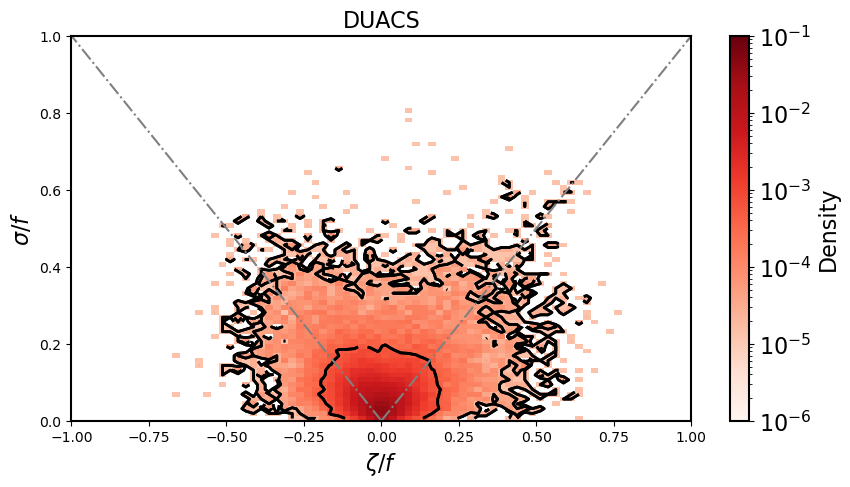

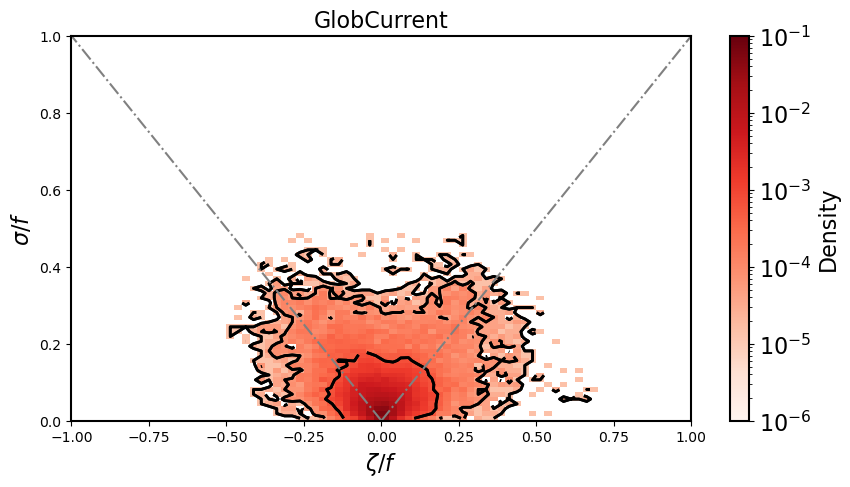

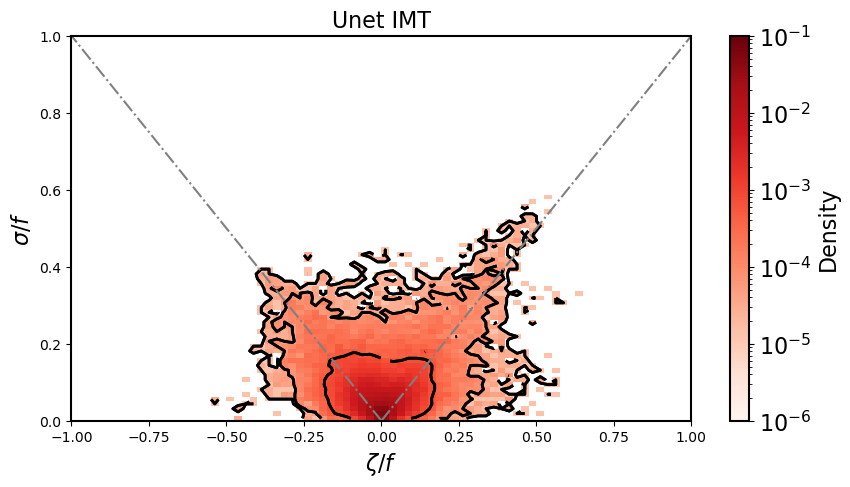

In [5]:
xp_name = "duacs_15m_8th"
box_gs = [-80, -30, 30, 60]
domain = box_gs
time_target="2019-02-01"
strain_duacs, vrt_duacs, lon, lat = compute_strain_vrt(xp_name,domain=domain,time_target=time_target)
#plot_map_zoom(strain.T,lon,lat,vmin=0,vmax=0.3,lat_mask=10)
#plot_map_zoom(vrt.T,lon,lat,vmin=0,vmax=0.3,lat_mask=10,zoom_extent=box_gs,zoom_ax=[0,0,1,1])
plot_jpdf(vrt_duacs,strain_duacs,title="DUACS")

xp_name = "globcurrent_15m_4th"
strain_gc, vrt_gc, lon, lat = compute_strain_vrt(xp_name,domain=domain,interp=True,time_target=time_target)
plot_jpdf(vrt_gc,strain_gc,title="GlobCurrent")

xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain_imt, vrt_imt, lon, lat = compute_strain_vrt(xp_name,domain=domain,interp=True,time_target=time_target)
plot_jpdf(vrt_imt,strain_imt,title="Unet IMT")

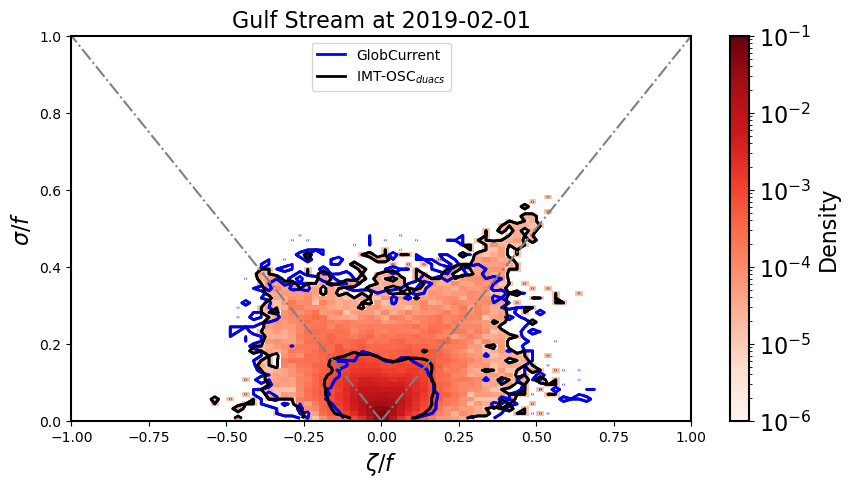

: 

In [ ]:
vrt_list = [vrt_gc, vrt_imt]
strain_list = [strain_gc, strain_imt]
color_list = ['b','k']
style_list = ['-','-']
label_list = ['GlobCurrent','IMT-OSC$_{duacs}$']
plot_jpdf_list_daily(vrt_list,strain_list,color_list,style_list,label_list,legend=True,title=f'Gulf Stream at {time_target}')

In [ ]:
list_proba = [99.9,90]

box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, -20, 55, 68]
box_circum = [0, 100, -60, -40]

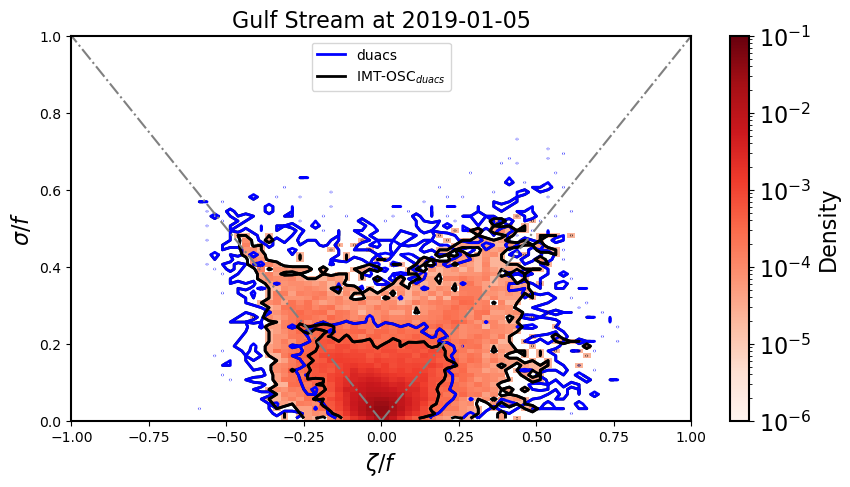

In [21]:
list_proba = [99.9,90]

box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, -20, 55, 68]
box_circum = [0, 100, -60, -40]

domain = box_gs
time_target="2019-01-05"
 
xp_name = "duacs_15m_8th"
strain_gc, vrt_gc, lon, lat = compute_strain_vrt(xp_name,domain=domain,interp=True,time_target=time_target)
#plot_jpdf(vrt_gc,strain_gc,title="GlobCurrent")

xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain_imt, vrt_imt, lon, lat = compute_strain_vrt(xp_name,domain=domain,interp=True,time_target=time_target)
#plot_jpdf(vrt_imt,strain_imt,title="Unet IMT")

vrt_list = [vrt_gc, vrt_imt]
strain_list = [strain_gc, strain_imt]
color_list = ['b','k']
style_list = ['-','-']
label_list = ['duacs','IMT-OSC$_{duacs}$']
plot_jpdf_list_daily(vrt_list,strain_list,color_list,style_list,label_list,legend=True,title=f'Gulf Stream at {time_target}')

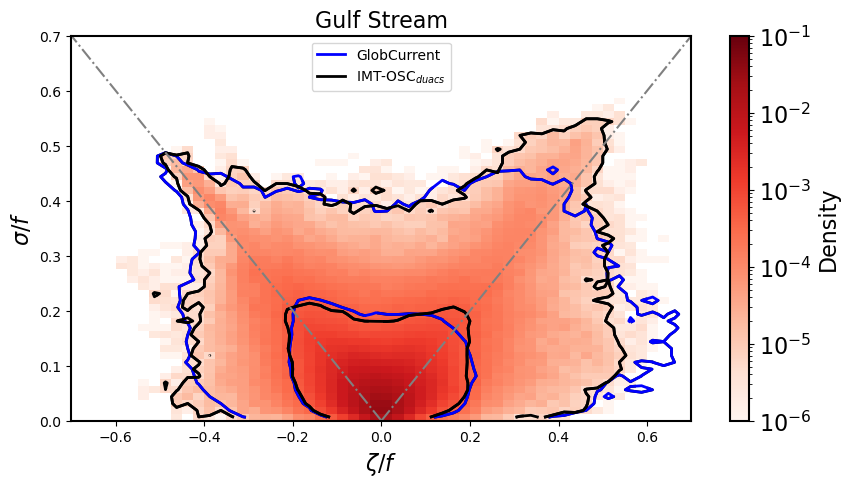

In [46]:
list_proba = [99.9,90]
#xp_name_list = ['neurost_sst_ssh_15m_10th','duacs_15m_8th','globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
xp_name_list = ['globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
domain=box_gs
color_list = ['b','k']
#color_list = ['red','grey','b','k']
#style_list = ['-','-','-','-']
style_list = ['-','-']
#label_list = ['NeurOST','duacs','GlobCurrent','IMT-OSC$_{duacs}$']
label_list = ['GlobCurrent','IMT-OSC$_{duacs}$']
# Définir la date de début et de fin
start_date = datetime(2019, 2, 1)
end_date = datetime(2019, 2, 28)
title="Gulf Stream"
plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=True,list_proba=list_proba,title=title)
plt.savefig(f"../figures/JPDF_GS_feb.png", dpi = 300)

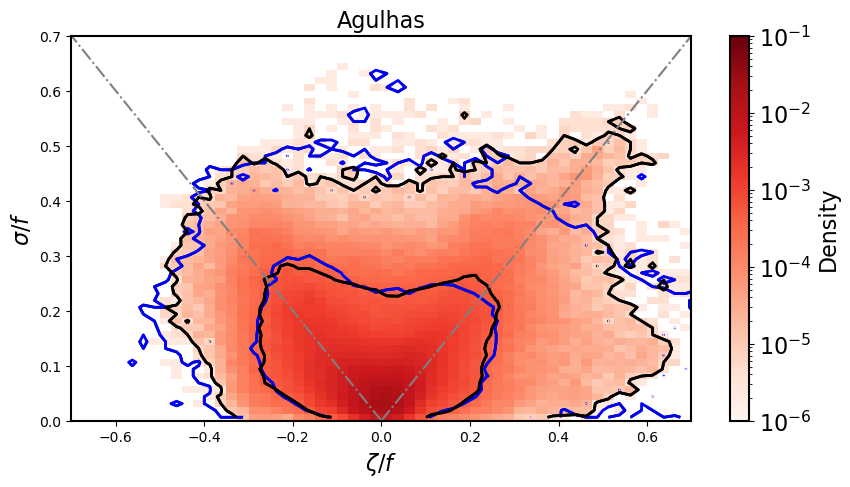

In [47]:
list_proba = [99.9,90]
#xp_name_list = ['neurost_sst_ssh_15m_10th','duacs_15m_8th','globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
xp_name_list = ['globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
domain=box_agulhas
color_list = ['b','k']
#color_list = ['red','grey','b','k']
#style_list = ['-','-','-','-']
style_list = ['-','-']
#label_list = ['NeurOST','duacs','GlobCurrent','IMT-OSC$_{duacs}$']
label_list = ['GlobCurrent','IMT-OSC$_{duacs}$']
# Définir la date de début et de fin
start_date = datetime(2019, 2, 1)
end_date = datetime(2019, 2, 28)
title="Agulhas"
plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=False,list_proba=list_proba,title=title)
plt.savefig(f"../figures/JPDF_agulhas_feb.png", dpi = 300)


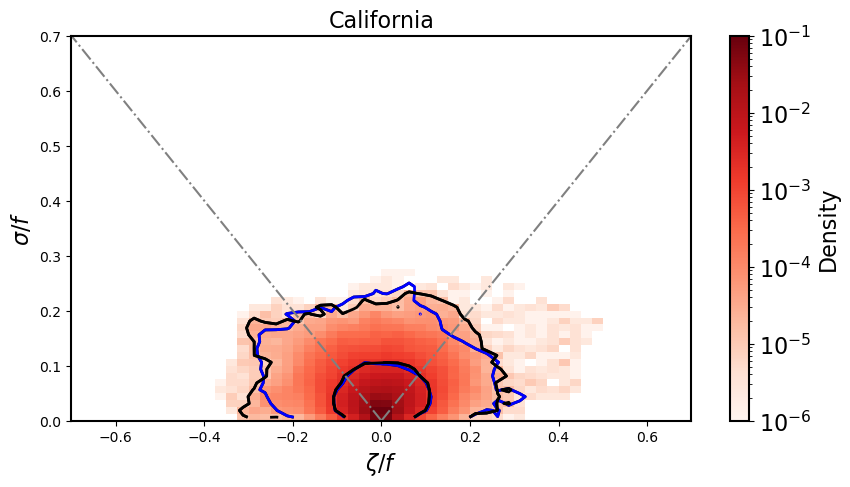

In [ ]:


list_proba = [99.9,90]
#xp_name_list = ['neurost_sst_ssh_15m_10th','duacs_15m_8th','globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
xp_name_list = ['globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
domain=box_cal
color_list = ['b','k']
#color_list = ['red','grey','b','k']
#style_list = ['-','-','-','-']
style_list = ['-','-']
#label_list = ['NeurOST','duacs','GlobCurrent','IMT-OSC$_{duacs}$']
label_list = ['GlobCurrent','IMT-OSC$_{duacs}$']
# Définir la date de début et de fin
start_date = datetime(2019, 2, 1)
end_date = datetime(2019, 2, 28)
title="California"
plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=False,list_proba=list_proba,title=title)
plt.savefig(f"../figures/JPDF_cal_feb.png", dpi = 300)

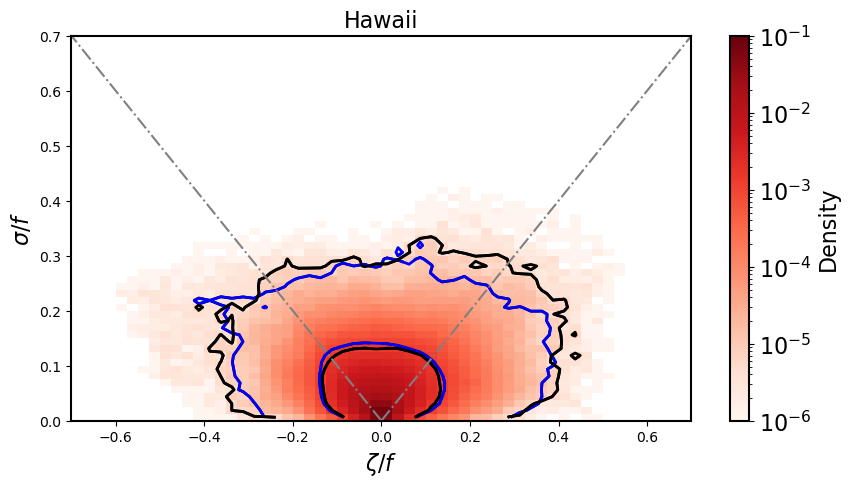

In [7]:
box_hawai = [-170, -120, 10, 40]
box_canari = [-40, -5, 10, 35]

list_proba = [99.9,90]
#xp_name_list = ['neurost_sst_ssh_15m_10th','duacs_15m_8th','globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
xp_name_list = ['globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
domain=box_hawai
color_list = ['b','k']
#color_list = ['red','grey','b','k']
#style_list = ['-','-','-','-']
style_list = ['-','-']
#label_list = ['NeurOST','duacs','GlobCurrent','IMT-OSC$_{duacs}$']
label_list = ['GlobCurrent','IMT-OSC$_{duacs}$']
# Définir la date de début et de fin
start_date = datetime(2019, 2, 1)
end_date = datetime(2019, 2, 28)
title="Hawaii"
plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=False,list_proba=list_proba,title=title)
plt.savefig(f"../figures/JPDF_hawai_feb.png", dpi = 300)

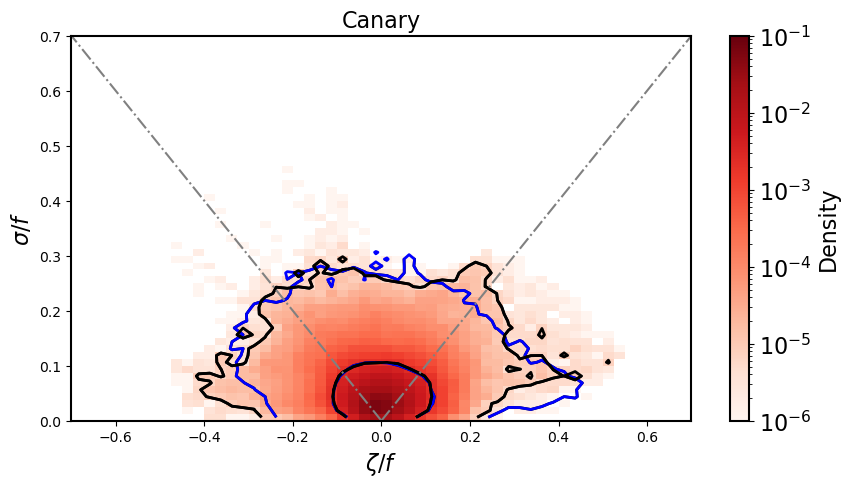

In [6]:
box_hawai = [-170, -120, 10, 40]
box_canari = [-40, -5, 10, 35]

list_proba = [99.9,90]
#xp_name_list = ['neurost_sst_ssh_15m_10th','duacs_15m_8th','globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
xp_name_list = ['globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
domain=box_canari
color_list = ['b','k']
#color_list = ['red','grey','b','k']
#style_list = ['-','-','-','-']
style_list = ['-','-']
#label_list = ['NeurOST','duacs','GlobCurrent','IMT-OSC$_{duacs}$']
label_list = ['GlobCurrent','IMT-OSC$_{duacs}$']
# Définir la date de début et de fin
start_date = datetime(2019, 2, 1)
end_date = datetime(2019, 2, 28)
title="Canary"
plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=False,list_proba=list_proba,title=title)
plt.savefig(f"../figures/JPDF_canary_feb.png", dpi = 300)

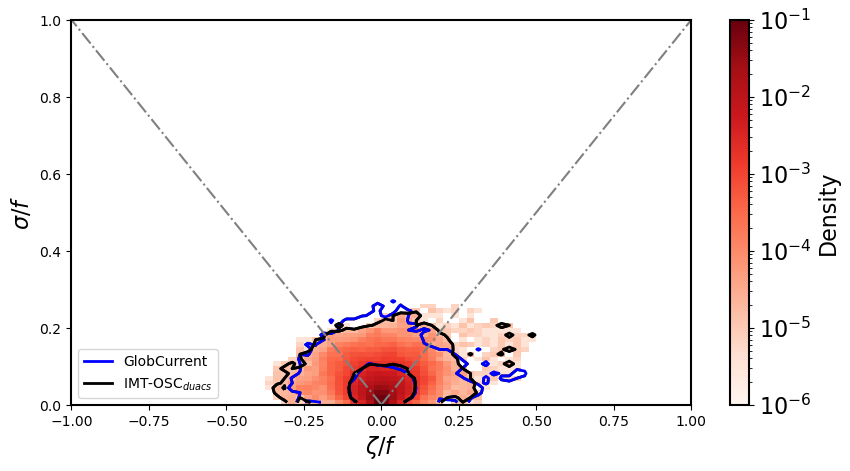

In [24]:
list_proba = [99.9,90]
xp_name_list = ['globcurrent_15m_4th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
domain=box_cal
color_list = ['b','k']
style_list = ['-','-']
label_list = ['GlobCurrent','IMT-OSC$_{duacs}$']
# Définir la date de début et de fin
start_date = datetime(2019, 2, 1)
end_date = datetime(2019, 2, 10)

plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=True,list_proba=list_proba)

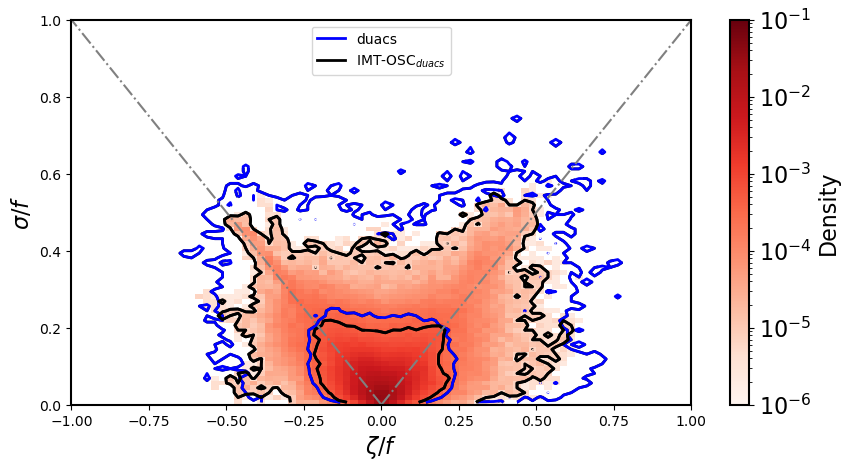

In [15]:
xp_name_list = ['duacs_15m_8th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet']
domain=box_gs
color_list = ['b','k']
style_list = ['-','-']
label_list = ['duacs','IMT-OSC$_{duacs}$']
# Définir la date de début et de fin
start_date = datetime(2019, 2, 1)
end_date = datetime(2019, 2, 10)

plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=True)

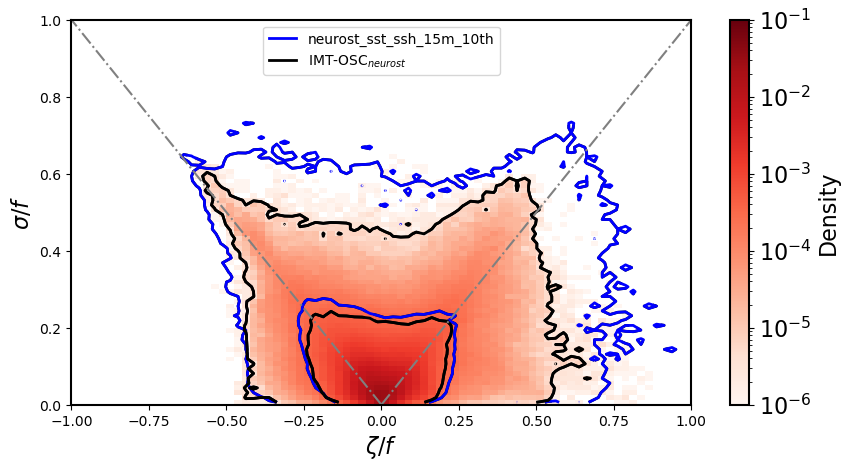

In [15]:
xp_name_list = ['neurost_sst_ssh_15m_10th', 'unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet']
domain=box_gs
color_list = ['b','k']
style_list = ['-','-']
label_list = ['neurost_sst_ssh_15m_10th','IMT-OSC$_{neurost}$']
# Définir la date de début et de fin
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 2, 1)

plot_jpdf_list(xp_name_list,domain,start_date,end_date,color_list,style_list,label_list,legend=True)

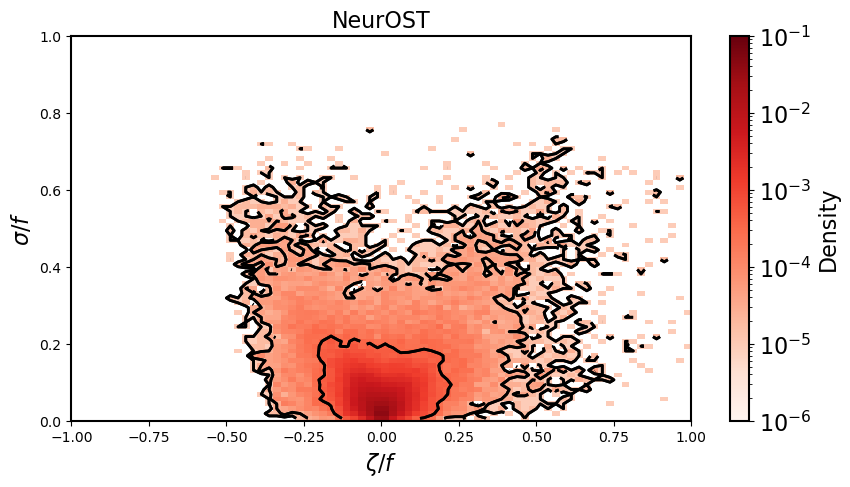

In [ ]:
xp_name = "neurost_sst_ssh_15m_10th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=domain)
plot_jpdf(vrt,strain,title="NeurOST")

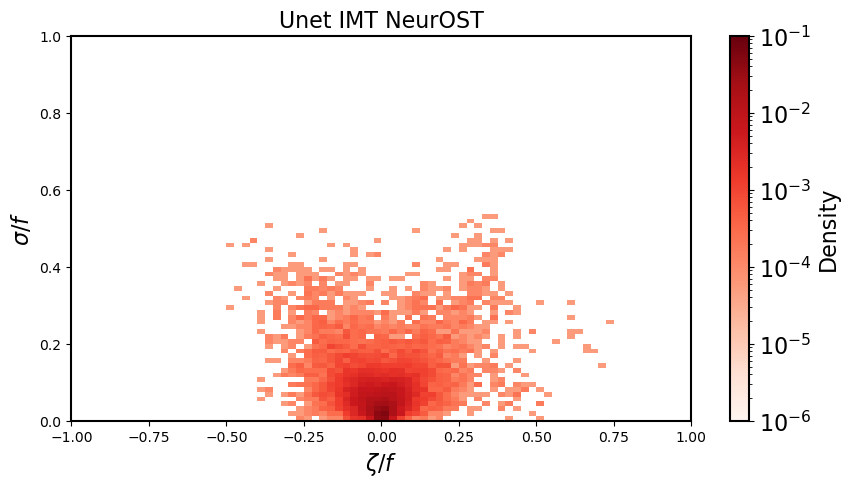

In [36]:
xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet"
strain, vrt, lon, lat = compute_strain_vrt(xp_name,domain=domain)
plot_jpdf(vrt,strain,title="Unet IMT NeurOST")

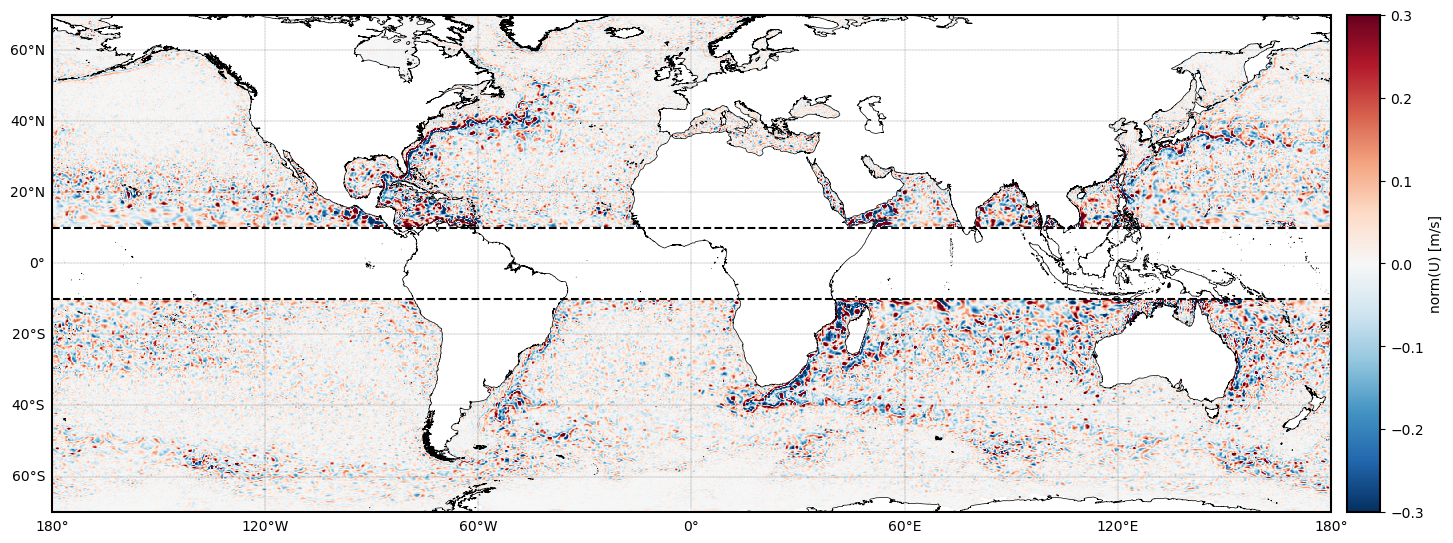

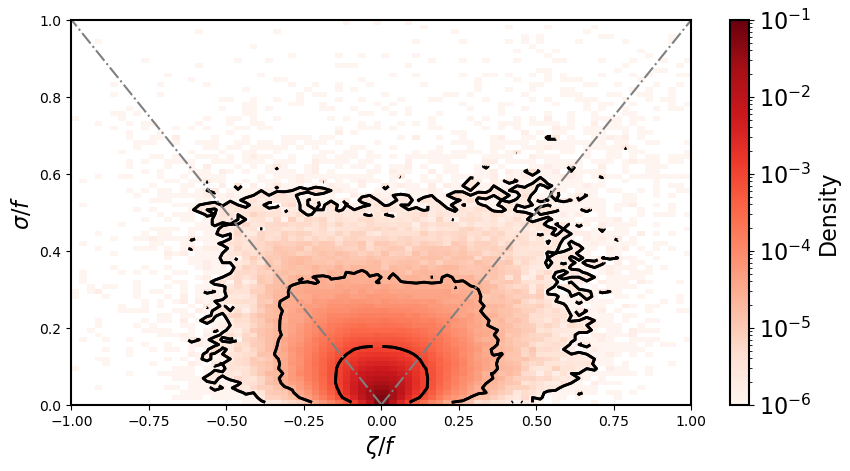

In [51]:
xp_name = "duacs_15m_8th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name)
plot_uv_map(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10)
plot_jpdf(vrt,strain)

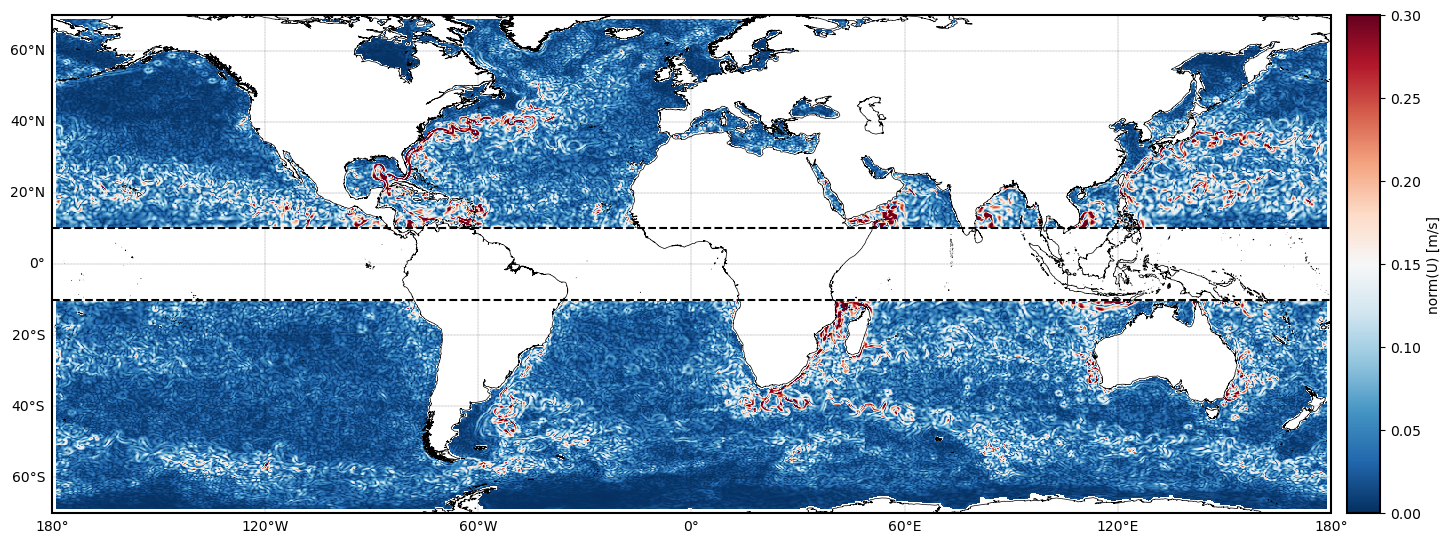

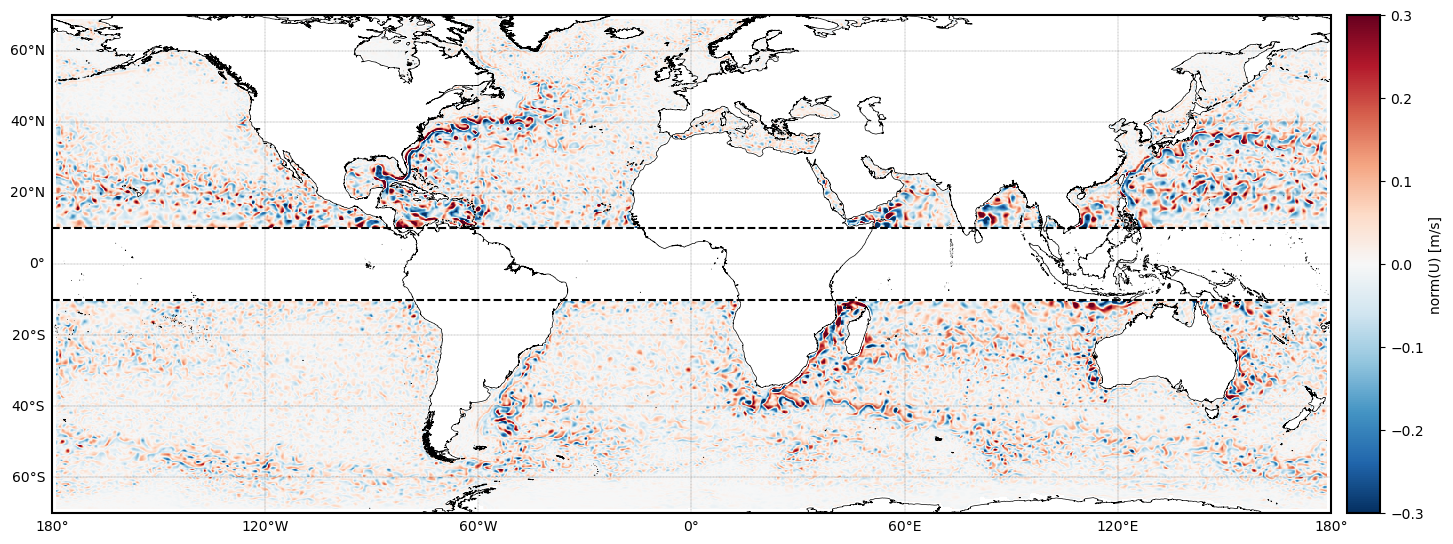

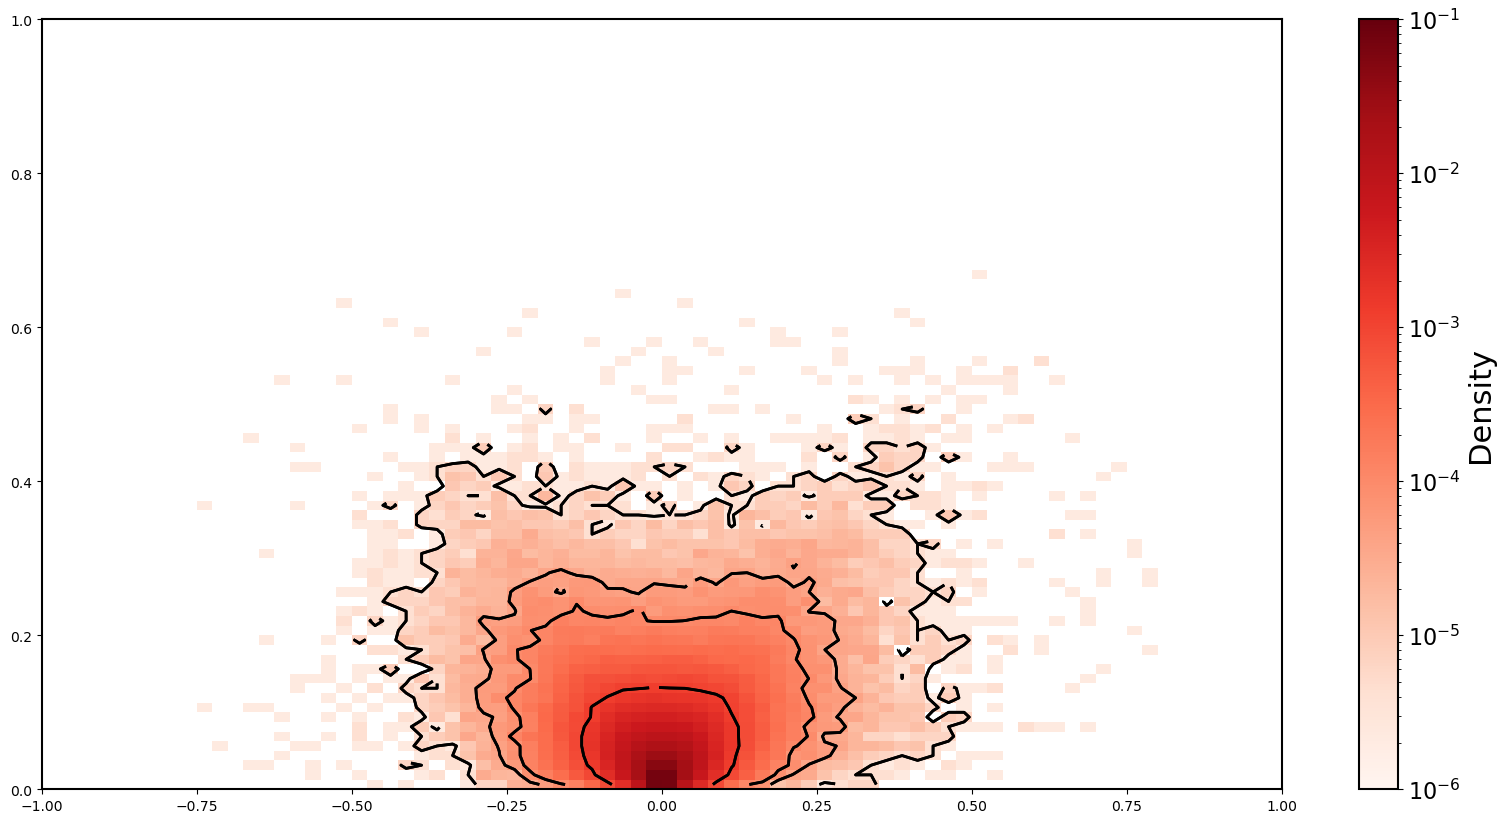

In [10]:
xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet"
strain, vrt, lon, lat = compute_strain_vrt(xp_name)
plot_uv_map(strain.T,lon,lat,vmin=0,vmax=0.3,lat_mask=10)
plot_uv_map(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10)
plot_jpdf(vrt,strain)

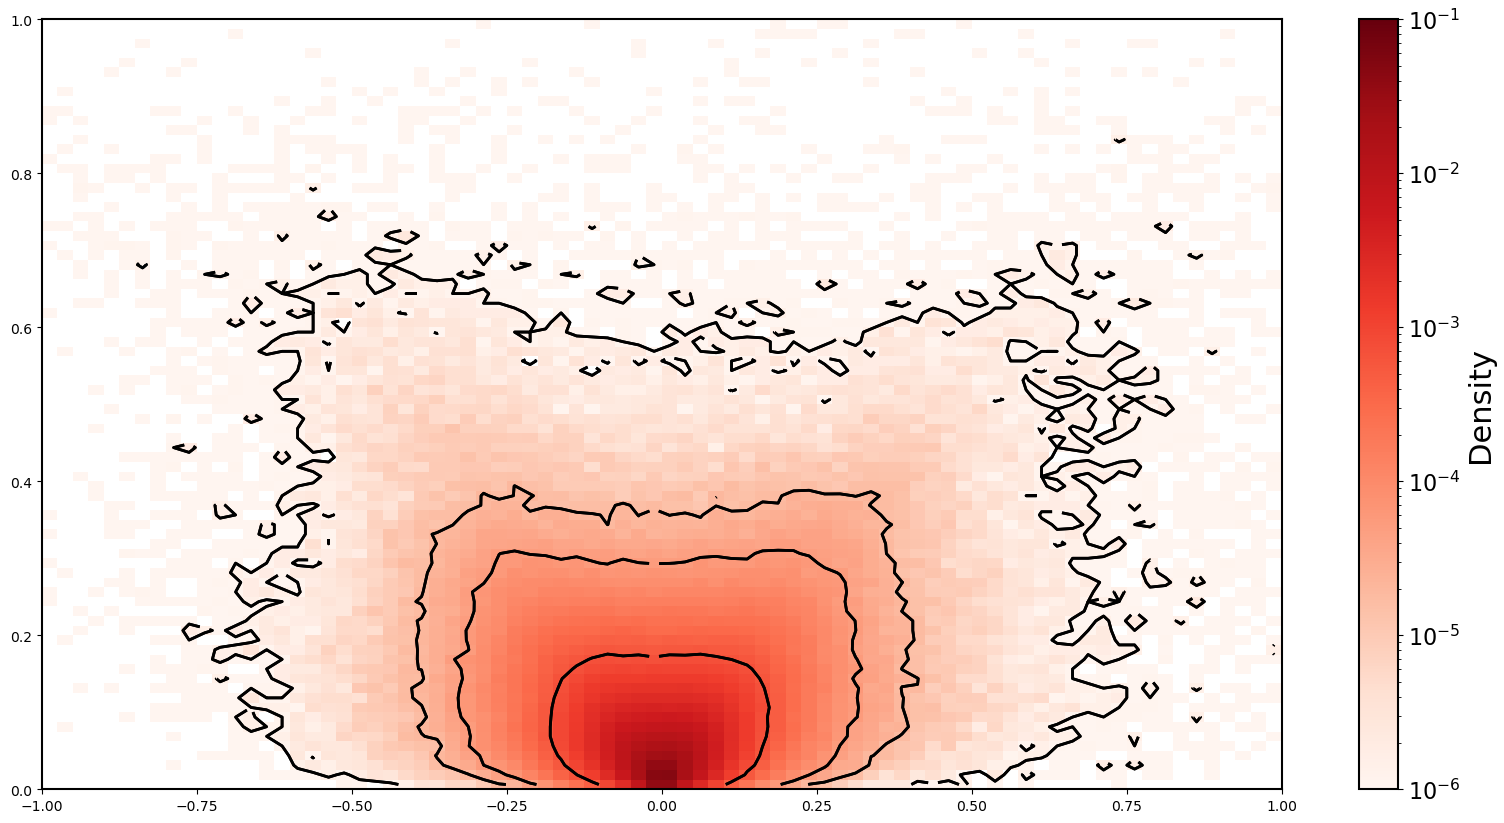

In [11]:
xp_name = "neurost_sst_ssh_15m_10th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name)
#plot_uv_map(strain.T,lon,lat,vmin=0,vmax=0.3,lat_mask=10)
#plot_uv_map(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10)
plot_jpdf(vrt,strain)

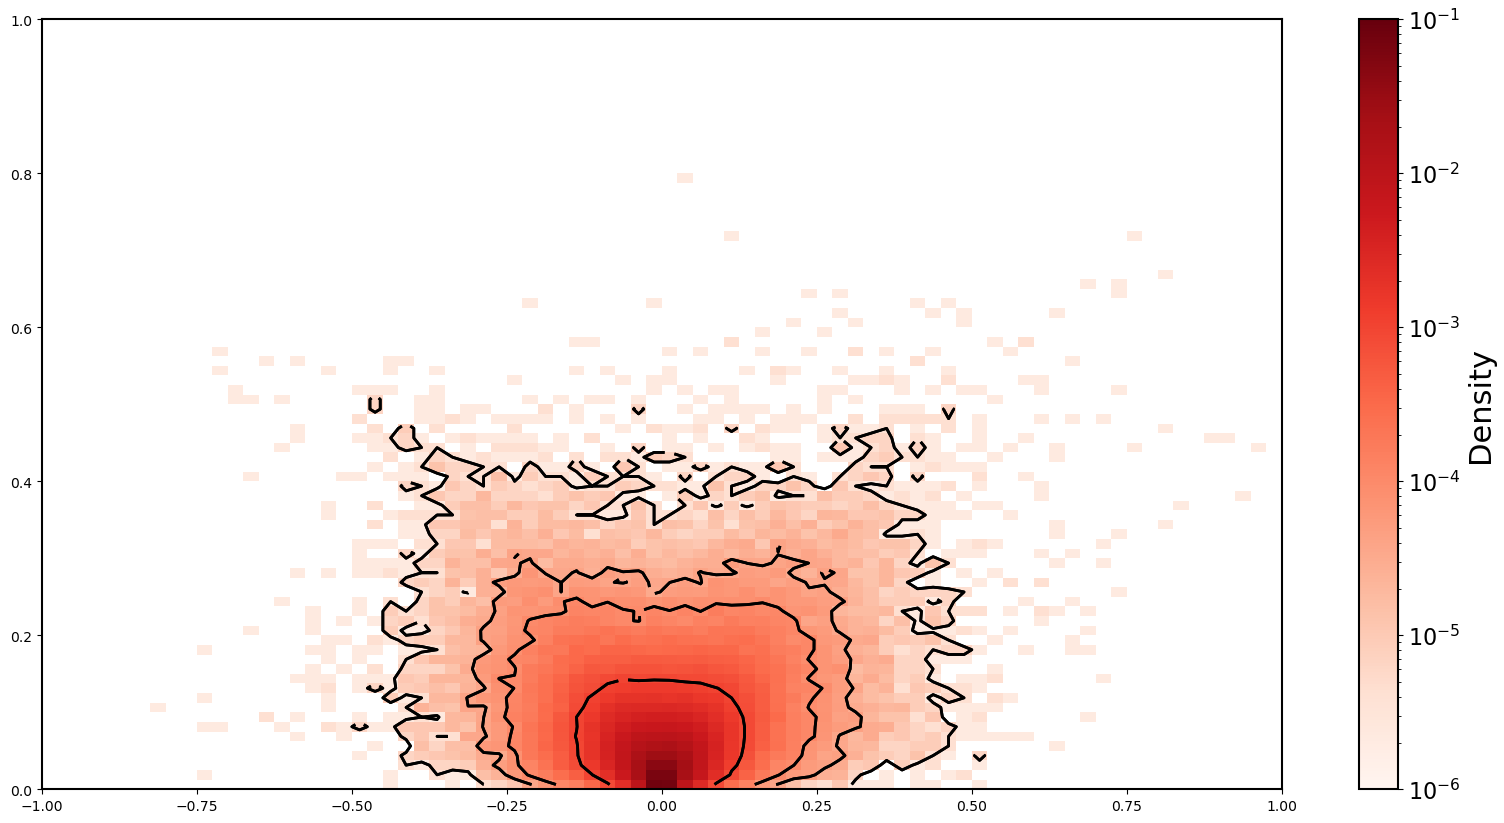

In [12]:
xp_name = "unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet"
strain, vrt, lon, lat = compute_strain_vrt(xp_name)
#plot_uv_map(strain.T,lon,lat,vmin=0,vmax=0.3,lat_mask=10)
#plot_uv_map(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10)
plot_jpdf(vrt,strain)

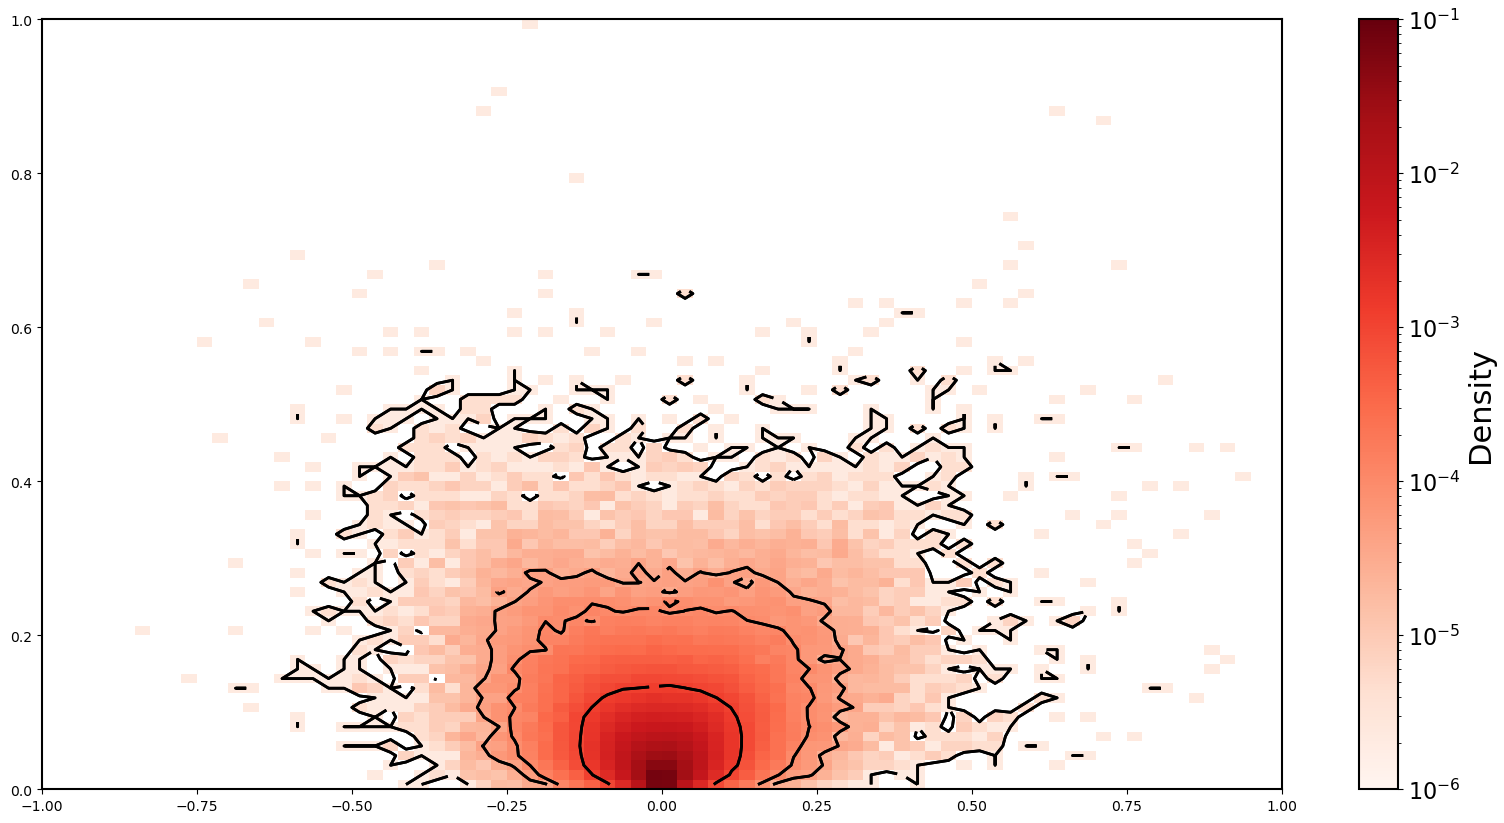

In [13]:
xp_name = "globcurrent_15m_4th"
strain, vrt, lon, lat = compute_strain_vrt(xp_name)
#plot_uv_map(strain.T,lon,lat,vmin=0,vmax=0.3,lat_mask=10)
#plot_uv_map(vrt.T,lon,lat,vmin=-0.3,vmax=0.3,lat_mask=10)
plot_jpdf(vrt,strain)